# Author: Rachita Mogaveera

### Prediction using Supervised ML

In [1]:
# importing all the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# reading the dataset

url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


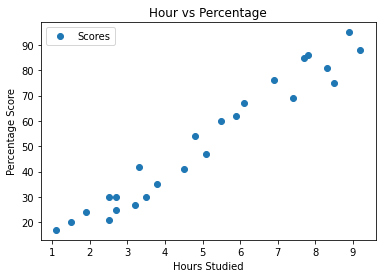

In [9]:
# visualizing the hours vs percentage

s_data.plot(x='Hours', y='Scores', style='o')
plt.title("Hour vs Percentage")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
# correlation between the independent and dependent variables

print(s_data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


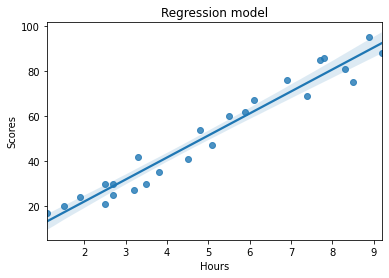

In [11]:
# using the popular regplot to visuzlize 

sns.regplot(x=s_data['Hours'], y=s_data['Scores'])
plt.title('Regression model')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [13]:
#splitting the data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [14]:
# using the train_test_split to split the X,y into train and test datasets

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

In [15]:
# using the Linear Regression model to train and fit it on the train dataset

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


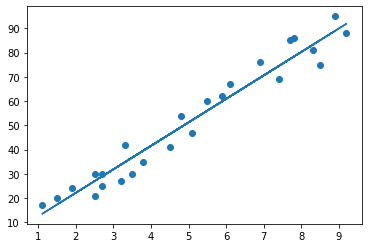

In [91]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [92]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [93]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [108]:
from sklearn import metrics  
import math
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared error:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Root Mean Squared error: 4.352380006653288


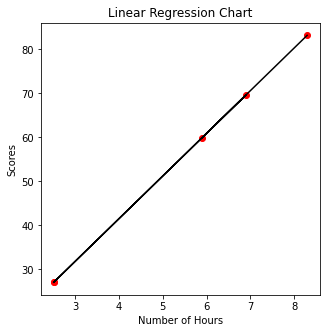

In [107]:
plt.figure(figsize=(5,5))
plt.scatter(X_test,y_pred, color="red")
plt.plot(X_test,y_pred, color="black")
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Linear Regression Chart")
plt.show()

In [112]:
# predicting the score for a student who studies for 9.5 hours
import numpy as np
X_new = np.array(9.25).reshape(-1,1)
regressor.predict(X_new)

array([92.38611528])